## 1.0 - E-commerce real da UK.


#### Esse dataset apresenta algumas variáveis como:

* InvoiceNo: Identificador da transação;
* StockCode: Idenficador do produto;
* Description: Descrição do produto;
* Quantity: Quantidade de vezes que aquele produto foi comprado;
* InvoiceDate: Data da transação;
* UnitPrice: Preço unitário;
* CustomerID: Identificador do usuário;
* Country: País de onde foi feito a transação.


## 2.0 - Perguntas feita pelo cliente

* Quais os produtos que mais são comprados por país?
* Qual tempo médio de recompra? Varia por país?
* Quais os produtos com maiores taxas de recompra?
* Quais os clusteres de produtos que mais saem em conjunto?
* Bônus: Segmentar os clientes em clusteres.





In [1]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

Nessa primeira etapa do projeto, será realizada uma breve análise exploratória  com o objetivo de ter um melhor entendimento sobre os dados.

In [3]:
#Verificar informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


O dataframe possui 541909 observações e 8 variáveis.

In [4]:
# Converter InvoiceDate para data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
#Criação de variáveis para hora, dia da semana e mês
df['Hour'] = df['InvoiceDate'].apply(lambda time: time.hour)
df['Month'] = df['InvoiceDate'].apply(lambda time: time.month)
df['Day of Week'] = df['InvoiceDate'].apply(lambda time: time.dayofweek)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Hour         541909 non-null  int64         
 9   Month        541909 non-null  int64         
 10  Day of Week  541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 45.5+ MB


In [7]:
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day of Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,2
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,8,12,2
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,8,12,2
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,8,12,2
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,8,12,2
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,8,12,2


In [8]:
#Atribuir o nome do dia da semana na base de dados
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [9]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day of Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,12,Wed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,Wed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,12,Wed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,Wed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,Wed


In [11]:
#Verificação de missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Hour                0
Month               0
Day of Week         0
dtype: int64

In [12]:
# % de missing values
porcentagem = df.isnull().sum() / df.shape[0] * 100
porcentagem

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
Hour            0.000000
Month           0.000000
Day of Week     0.000000
dtype: float64

In [13]:
#Remoção das observações que tem missing values
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Hour         406829 non-null  int64         
 9   Month        406829 non-null  int64         
 10  Day of Week  406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 37.2+ MB


Após a remoção dos missing values, a base de dados agora possui 406829 observações e 8 variáveis.

In [15]:
#Verificação de observações duplicados
df.duplicated().sum()

5225

In [16]:
df=df.drop_duplicates()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   Hour         401604 non-null  int64         
 9   Month        401604 non-null  int64         
 10  Day of Week  401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 36.8+ MB


Foram removidas 5225 observações duplicadas, e agora a base de dados possui 401604 observações

In [18]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


De acordo com o quadro acima, nota-se que há valores negativos em quantity, o que não faz sentido. Investigando mais afundo, percebeu-se que os valores negativos são referentes a pedidos que foram cancelados, correspondendo a 2,2%, o que pode ser visto no quadro abaixo. 

In [19]:
df["CancelledOrder"]=np.where(df.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
df.CancelledOrder.value_counts() / df.shape[0] * 100

False    97.790859
True      2.209141
Name: CancelledOrder, dtype: float64

In [20]:
df.loc[df.CancelledOrder==True].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day of Week,CancelledOrder
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,9,12,Wed,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,9,12,Wed,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,10,12,Wed,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10,12,Wed,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10,12,Wed,True


In [21]:
#Remoção dos valores negativos
df = df[df.Quantity > 0]

Após a remoção dos valores negativos, criou-se a váriavel AmountSpent (Valor gasto), essa váriavel é importante para saber o quanto foi gasto em um produto por transação.

In [22]:
df['AmountSpent']=df['Quantity']*df['UnitPrice']

In [23]:
#Estatisticas descritivas com a nova váriavel
df[['Quantity', 'UnitPrice', 'AmountSpent']].describe().round(2)

,Quantity,UnitPrice,AmountSpent
count,392732.00,392732.00,392732.00
mean,13.15,3.13,22.63
std,181.59,22.24,311.08
min,1.00,0.00,0.00
25%,2.00,1.25,4.95
50%,6.00,1.95,12.39
75%,12.00,3.75,19.80
max,80995.00,8142.75,168469.60


<AxesSubplot:title={'center':'Números de pedidos pormês'}>

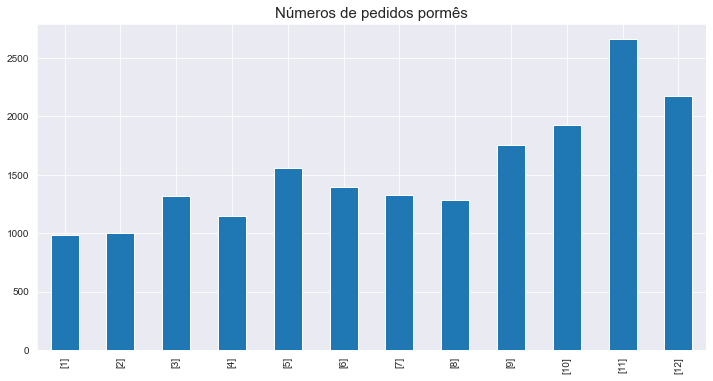

In [24]:
# Gráficos para saber qual mês e qual dia da semana há mais vendas
plt.figure(figsize=(12,6))
plt.title("Números de pedidos pormês", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['Month'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

<AxesSubplot:title={'center':'Números de pedidos dia da semana'}>

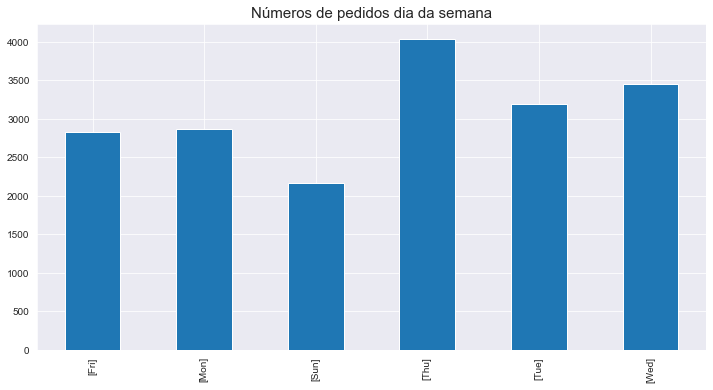

In [25]:
plt.figure(figsize=(12,6))
plt.title("Números de pedidos dia da semana", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['Day of Week'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

De acordo com os gráficos acima, o mês com mais venda é novembro e o dia com mais venda é quinta feira.

In [26]:
#Verificação de quantos produtos diferentes há no estoque
df['StockCode'].nunique()


3665

In [27]:
#Lista com os 10 produtos mais vendidos
df.Description.value_counts().sort_values(ascending=False).head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: Description, dtype: int64

In [28]:
#Número de transações
df['InvoiceNo'].nunique()

18536

In [29]:
#Número de clientes
df['CustomerID'].nunique()

4339

In [30]:
# Top 10 Clientes mais frequentes
df.CustomerID.value_counts().sort_values(ascending=False).head(10)

17841.0    7676
14911.0    5672
14096.0    5111
12748.0    4413
14606.0    2677
15311.0    2366
14646.0    2080
13089.0    1814
13263.0    1667
14298.0    1637
Name: CustomerID, dtype: int64

In [31]:
#Descrição dos produtos
df.Description.nunique()

3877

In [32]:
#Lista com os produtos mais descritos
df.Description.value_counts().sort_values(ascending=False).head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: Description, dtype: int64

O número de produtos diferentes e de descrição dos produtos é diferente porque provalmente houveram alguns erros na hora de colocar a descrição do produto na base de dados

In [33]:
#Número de países que foram realizado pedidos
df.Country.nunique()

37

C:\Users\temp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


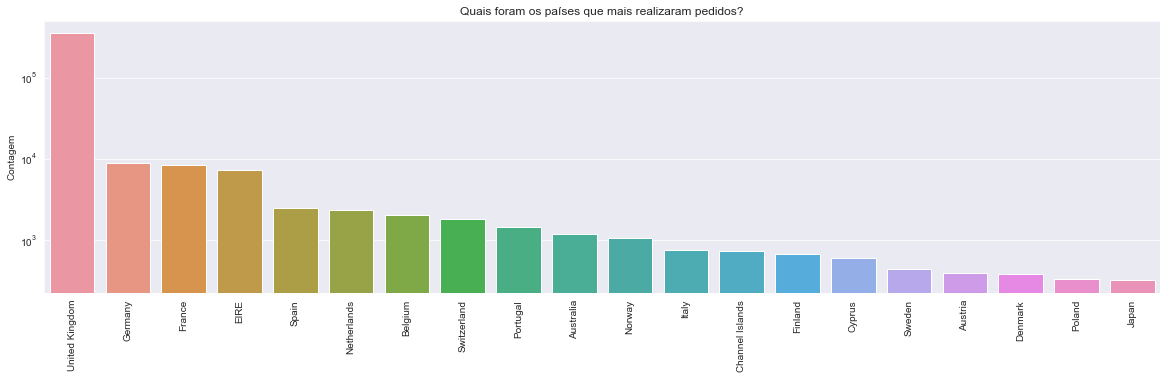

In [34]:
#Quais paises mais realizaram pedidos
country_counts = df.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values)
plt.ylabel("Contagem")
plt.title("Quais foram os países que mais realizaram pedidos?");
plt.xticks(rotation=90);
plt.yscale("log")


In [35]:
df.loc[df.Country=="United Kingdom"].shape[0] / df.shape[0] * 100

88.92247130358616

De acordo com o cógido acima, o Reino Unido foi resposável por quase 89% dos pedidos

Nessa parte do trabalho, as perguntas realizadas pelo cliente começarão a serem respondidas, começando pela pergunta: Quais os produtos que mais são comprados por país?
Para não ficar um trabalho muito extenso, serão escolhidos os 5 primeiros países do gráfico acima.

In [36]:
#Reino Unido
df[df["Country"] == 'United Kingdom'].Description.value_counts().sort_values(ascending=False).head(10)

WHITE HANGING HEART T-LIGHT HOLDER    1929
JUMBO BAG RED RETROSPOT               1461
REGENCY CAKESTAND 3 TIER              1417
ASSORTED COLOUR BIRD ORNAMENT         1320
PARTY BUNTING                         1301
LUNCH BAG RED RETROSPOT               1135
LUNCH BAG  BLACK SKULL.               1022
SET OF 3 CAKE TINS PANTRY DESIGN      1013
PAPER CHAIN KIT 50'S CHRISTMAS         967
HEART OF WICKER SMALL                  946
Name: Description, dtype: int64

In [37]:
#Alemanha
df[df["Country"] == 'Germany'].Description.value_counts().sort_values(ascending=False).head(10)

POSTAGE                                374
ROUND SNACK BOXES SET OF4 WOODLAND     112
ROUND SNACK BOXES SET OF 4 FRUITS       72
PLASTERS IN TIN WOODLAND ANIMALS        63
REGENCY CAKESTAND 3 TIER                63
WOODLAND CHARLOTTE BAG                  58
PLASTERS IN TIN CIRCUS PARADE           53
PLASTERS IN TIN SPACEBOY                49
SPACEBOY LUNCH BOX                      47
6 RIBBONS RUSTIC CHARM                  47
Name: Description, dtype: int64

In [38]:
#França
df[df["Country"] == 'France'].Description.value_counts().sort_values(ascending=False).head(10)

POSTAGE                                300
RABBIT NIGHT LIGHT                      73
RED TOADSTOOL LED NIGHT LIGHT           70
PLASTERS IN TIN WOODLAND ANIMALS        67
PLASTERS IN TIN CIRCUS PARADE           66
ROUND SNACK BOXES SET OF4 WOODLAND      62
LUNCH BAG RED RETROSPOT                 60
LUNCH BOX WITH CUTLERY RETROSPOT        56
RED RETROSPOT MINI CASES                54
SET/6 RED SPOTTY PAPER CUPS             54
Name: Description, dtype: int64

In [39]:
#Irlanda
df[df["Country"] == 'EIRE'].Description.value_counts().sort_values(ascending=False).head(10)

CARRIAGE                              98
REGENCY CAKESTAND 3 TIER              64
ROSES REGENCY TEACUP AND SAUCER       44
WHITE HANGING HEART T-LIGHT HOLDER    40
VINTAGE SNAP CARDS                    38
GREEN REGENCY TEACUP AND SAUCER       34
SET OF 3 REGENCY CAKE TINS            34
JAM MAKING SET WITH JARS              31
JAM MAKING SET PRINTED                29
PINK REGENCY TEACUP AND SAUCER        28
Name: Description, dtype: int64

In [40]:
#Espanha
df[df["Country"] == 'Spain'].Description.value_counts().sort_values(ascending=False).head(10)

POSTAGE                                62
REGENCY CAKESTAND 3 TIER               22
6 RIBBONS RUSTIC CHARM                 15
JAM MAKING SET WITH JARS               14
ROUND SNACK BOXES SET OF4 WOODLAND     12
ASSORTED COLOUR BIRD ORNAMENT          12
SPACEBOY LUNCH BOX                     12
PACK OF 72 RETROSPOT CAKE CASES        11
WHITE HANGING HEART T-LIGHT HOLDER     11
PLASTERS IN TIN SKULLS                 11
Name: Description, dtype: int64

Qual tempo médio de recompra? Varia por país?

In [41]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [42]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [43]:
temp = df.groupby(by=['CustomerID', 'InvoiceNo', 'Country'], as_index=False)['AmountSpent'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})

In [44]:
temp

,CustomerID,InvoiceNo,Country,AmountSpent
0,12346.0,541431,United Kingdom,77183.60
1,12347.0,537626,Iceland,711.79
2,12347.0,542237,Iceland,475.39
3,12347.0,549222,Iceland,636.25
4,12347.0,556201,Iceland,382.52
...,...,...,...,...
18531,18283.0,579673,United Kingdom,220.31
18532,18283.0,580872,United Kingdom,208.00
18533,18287.0,554065,United Kingdom,765.28
18534,18287.0,570715,United Kingdom,1001.32


In [45]:
basket_price

,CustomerID,InvoiceNo,Country,AmountSpent
0,12346.0,541431,United Kingdom,77183.60
1,12347.0,537626,Iceland,711.79
2,12347.0,542237,Iceland,475.39
3,12347.0,549222,Iceland,636.25
4,12347.0,556201,Iceland,382.52
...,...,...,...,...
18531,18283.0,579673,United Kingdom,220.31
18532,18283.0,580872,United Kingdom,208.00
18533,18287.0,554065,United Kingdom,765.28
18534,18287.0,570715,United Kingdom,1001.32


In [46]:

df['InvoiceDate_int'] = df['InvoiceDate'].astype('int64')
temp = df.groupby(by=['CustomerID', 'InvoiceNo', 'Country'], as_index=False)['InvoiceDate_int'].mean()
df.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])


In [47]:
temp

,CustomerID,InvoiceNo,Country,InvoiceDate_int
0,12346.0,541431,United Kingdom,1295344860000000000
1,12347.0,537626,Iceland,1291733820000001024
2,12347.0,542237,Iceland,1296052199999999744
3,12347.0,549222,Iceland,1302172979999999232
4,12347.0,556201,Iceland,1307624460000000256
...,...,...,...,...
18531,18283.0,579673,United Kingdom,1322657939999998720
18532,18283.0,580872,United Kingdom,1323172920000001792
18533,18287.0,554065,United Kingdom,1306060739999998976
18534,18287.0,570715,United Kingdom,1318414979999998720


In [48]:
basket_price

,CustomerID,InvoiceNo,Country,AmountSpent,InvoiceDate
0,12346.0,541431,United Kingdom,77183.60,2011-01-18 10:01:00.000000000
1,12347.0,537626,Iceland,711.79,2010-12-07 14:57:00.000001024
2,12347.0,542237,Iceland,475.39,2011-01-26 14:29:59.999999744
3,12347.0,549222,Iceland,636.25,2011-04-07 10:42:59.999999232
4,12347.0,556201,Iceland,382.52,2011-06-09 13:01:00.000000256
...,...,...,...,...,...
18531,18283.0,579673,United Kingdom,220.31,2011-11-30 12:58:59.999998720
18532,18283.0,580872,United Kingdom,208.00,2011-12-06 12:02:00.000001792
18533,18287.0,554065,United Kingdom,765.28,2011-05-22 10:38:59.999998976
18534,18287.0,570715,United Kingdom,1001.32,2011-10-12 10:22:59.999998720


In [49]:
basket_price = basket_price[basket_price['AmountSpent'] > 0]
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Country,AmountSpent,InvoiceDate
0,12346.0,541431,United Kingdom,77183.60,2011-01-18 10:01:00.000000000
1,12347.0,537626,Iceland,711.79,2010-12-07 14:57:00.000001024
2,12347.0,542237,Iceland,475.39,2011-01-26 14:29:59.999999744
3,12347.0,549222,Iceland,636.25,2011-04-07 10:42:59.999999232
4,12347.0,556201,Iceland,382.52,2011-06-09 13:01:00.000000256
5,12347.0,562032,Iceland,584.91,2011-08-02 08:48:00.000000000


In [50]:
transactions_per_user=basket_price.groupby(by=['CustomerID', 'Country'])['AmountSpent'].agg(['count','min','max','mean','sum'])

In [51]:
transactions_per_user

,,count,min,max,mean,sum
CustomerID,Country,,,,,
12346.0,United Kingdom,1,77183.60,77183.60,77183.600000,77183.60
12347.0,Iceland,7,224.82,1294.32,615.714286,4310.00
12348.0,Finland,4,227.44,892.80,449.310000,1797.24
12349.0,Italy,1,1757.55,1757.55,1757.550000,1757.55
12350.0,Norway,1,334.40,334.40,334.400000,334.40
...,...,...,...,...,...,...
18280.0,United Kingdom,1,180.60,180.60,180.600000,180.60
18281.0,United Kingdom,1,80.82,80.82,80.820000,80.82
18282.0,United Kingdom,2,77.84,100.21,89.025000,178.05


In [52]:
last_date = basket_price['InvoiceDate'].max().date()
last_date

datetime.date(2011, 12, 9)

In [53]:
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user

,,count,min,max,mean,sum,LastPurchase,FirstPurchase
CustomerID,Country,,,,,,,
12346.0,United Kingdom,1,77183.60,77183.60,77183.600000,77183.60,NaN,NaN
12347.0,Iceland,7,224.82,1294.32,615.714286,4310.00,NaN,NaN
12348.0,Finland,4,227.44,892.80,449.310000,1797.24,NaN,NaN
12349.0,Italy,1,1757.55,1757.55,1757.550000,1757.55,NaN,NaN
12350.0,Norway,1,334.40,334.40,334.400000,334.40,NaN,NaN
...,...,...,...,...,...,...,...,...
18280.0,United Kingdom,1,180.60,180.60,180.600000,180.60,NaN,NaN
18281.0,United Kingdom,1,80.82,80.82,80.820000,80.82,NaN,NaN
18282.0,United Kingdom,2,77.84,100.21,89.025000,178.05,NaN,NaN


No quadro acima, deu um erro em LastPurchase e FirstPurchase, eu tentei consertar o código mas não consegui. Mas a ideia era tirar a diferença entre as datas de primeira e ultima compra e dividir pela frequência de compras do cliente para obter a média do cliente.

LastPurchase-FirstPurchase/count

Depois eu ia filtrar por países e iria tirar a média para saber o tempo médio de recompra por país.

In [54]:
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]

In [55]:
n1

1499

In [56]:
#Porcentagem de clientes que realizou somente um compra
(n1/4346)*100

34.49148642429821

Agora o próximo passo é responder a seguinte pergunta: Quais os produtos com maiores taxas de recompra?

In [57]:
#Produtos pedidos primeira vez

df_sort = df.sort_values(['CustomerID', 'StockCode', 'InvoiceDate'])
df_sort_shift1 = df_sort.shift(1)
df_sort_reorder = df_sort.copy()
df_sort_reorder['reorder'] = np.where(df_sort['StockCode'] == df_sort_shift1['StockCode'], 1,0)
df_sort_reorder.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day of Week,CancelledOrder,AmountSpent,reorder
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,10,1,Tue,False,77183.6,0
148306,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24,2011-04-07 10:43:00,0.25,12347.0,Iceland,10,4,Thu,False,6.0,0
220583,556201,17021,NAMASTE SWAGAT INCENSE,36,2011-06-09 13:01:00,0.30,12347.0,Iceland,13,6,Thu,False,10.8,0
148289,549222,20665,RED RETROSPOT PURSE,6,2011-04-07 10:43:00,2.95,12347.0,Iceland,10,4,Thu,False,17.7,0
72249,542237,20719,WOODLAND CHARLOTTE BAG,10,2011-01-26 14:30:00,0.85,12347.0,Iceland,14,1,Wed,False,8.5,0


In [58]:
#Top 10 produtos com maiores taxas de recompra
pd.DataFrame((df_sort_reorder.groupby(['Description'])['reorder'].sum())).sort_values('reorder', ascending = False).head(10)

,reorder
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1160
JUMBO BAG RED RETROSPOT,980
REGENCY CAKESTAND 3 TIER,833
LUNCH BAG RED RETROSPOT,772
POSTAGE,768
ASSORTED COLOUR BIRD ORNAMENT,717
PARTY BUNTING,682
LUNCH BAG BLACK SKULL.,620
LUNCH BAG SUKI DESIGN,603


A próxima etapa do trabalho é responder a seguinte pergunta: Quais os clusteres de produtos que mais saem em conjunto? Nessa etapa do trabalho, serão usadas técnicas de associação para determinar quais são os produtos que mais saem em conjunto.
Há 3 parâmetros em basket analysis. Estes são support, confidence e lift.
Support calcula a probabilidade de que os itens sejam comprados juntos.
Confidence significa que, dado um item comprado, quão provável é que o próximo item seja comprado.
Lift é a razão entre a confidence e support. Um lift superior significa que há uma forte associação de que os itens serão comprados juntos.
Na análise será baseada no parametro Lift.

In [59]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [60]:
df['Description'] = df['Description'].str.strip() #remoção de espaços
df = df[~df['Description'].isin(['?',' '])]#remoção de ? e espaços em branco

In [61]:
mybasket = (df
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [62]:
mybasket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18536 entries, 536365 to 581587
Columns: 3866 entries, 10 COLOUR SPACEBOY PEN to ZINC WIRE SWEETHEART LETTER TRAY
dtypes: float64(3866)
memory usage: 546.9+ MB


In [63]:
#convertendo todos os valores positivos em 1 e o resto em 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)
my_basket_sets.drop('POSTAGE', inplace=True, axis=1) #remoção "postage" como item

In [64]:
#Geração de itens frequentes
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.02, use_colnames=True)

In [65]:
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [66]:
#Top 20 de produtos
my_rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.047313,0.042566,0.028593,0.604333,14.197612,0.026579,2.419798
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.042566,0.047313,0.028593,0.671736,14.197612,0.026579,2.902200
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.047313,0.033071,0.021364,0.451539,13.653725,0.019799,1.762987
3,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.033071,0.047313,0.021364,0.646003,13.653725,0.019799,2.691230
4,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.037980,0.033233,0.022874,0.602273,18.122934,0.021612,2.430729
5,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.033233,0.037980,0.022874,0.688312,18.122934,0.021612,3.086480
6,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.040785,0.034258,0.024978,0.612434,17.877282,0.023581,2.491813
7,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.034258,0.040785,0.024978,0.729134,17.877282,0.023581,3.541286
8,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.037279,0.029996,0.024817,0.665702,22.193256,0.023698,2.901615
9,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029996,0.037279,0.024817,0.827338,22.193256,0.023698,5.575760


In [67]:
my_rules1 = my_rules.sort_values(by=['lift'],ascending=False)

In [68]:
# reiniciar o índice para começar a partir do número 1
my_rules1.index = np.arange(1,len(my_rules)+1)

In [69]:
#top 20
my_rules1.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.029996,0.029186,0.021040,0.701439,24.033032,0.020165,3.251641
2,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.029186,0.029996,0.021040,0.720887,24.033032,0.020165,3.475313
3,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.037279,0.023522,0.021040,0.564399,23.994742,0.020163,2.241683
4,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.023522,0.037279,0.021040,0.894495,23.994742,0.020163,9.124923
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029996,0.037279,0.024817,0.827338,22.193256,0.023698,5.575760
6,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.037279,0.029996,0.024817,0.665702,22.193256,0.023698,2.901615
7,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.024817,0.042242,0.021040,0.847826,20.070631,0.019992,6.293837
8,(ROSES REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.042242,0.024817,0.021040,0.498084,20.070631,0.019992,1.942923
9,(ROSES REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.042242,0.029996,0.023522,0.556833,18.563760,0.022255,2.188799
10,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.029996,0.042242,0.023522,0.784173,18.563760,0.022255,4.437611


A ultima parte do trabalho será feita uma segmentação dos clientes, a segmentação dos clientes pode ser importante, por exemplo, para determinar que tipo de marketing será feito para determinado grupo.
Nessa etapa, a técnica RFM será utilizada. 
A análise RFM é uma estratégia de marketing para analisar e estimar o valor de um cliente, com base em três váriaveis: Recência (com que frequência o cliente fez uma compra), Frequência (com que frequência eles compram) e Valor monetário (Quanto eles gastar) a fim de prever quais clientes têm maior probabilidade de realizar novas compras no futuro.

In [70]:
import datetime as dt
now = dt.date(2011,12,9)

In [71]:
df['date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [72]:
recency_df = df.groupby(['CustomerID'],as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [73]:
#calcular com que frequência o cliente está comprando com referência à última data em dias.

recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)

In [74]:
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [75]:
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [76]:
#verificar transações foram feitas por cliente.

frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [77]:
#verificar a soma dos gastos de um cliente em relação à data mais recente.

monetary_df=df.groupby('CustomerID',as_index=False)['AmountSpent'].sum()
monetary_df.columns = ['CustomerID','Monetary']

In [78]:
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [79]:
#Combinar regency, frequency and monetary em um DataFrame.


rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')


rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')

rfm.set_index('CustomerID',inplace=True)

In [80]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40


In [81]:
#trazer todo o valor quartil em um único dataframe

rfm_segmentation = rfm.copy()

In [82]:
# Packages adicionais
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans 

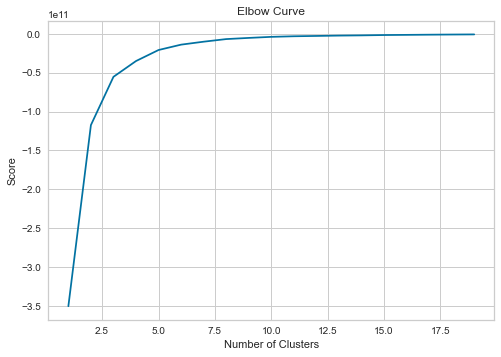

In [83]:
#Modelação
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

De acordo com o método cotovelo na figura acima, K=3

In [85]:
#Ajustando os dados no modelo.
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

In [86]:
# Crianda uma variável com o respectivo cluster.
rfm_segmentation['cluster'] = kmeans.labels_

C:\Users\temp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='Recency'>

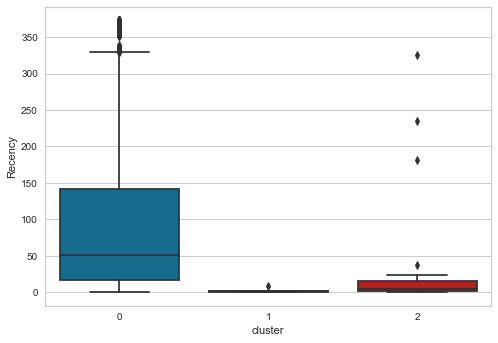

In [87]:
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Recency)

Cluster 0 tem a maior recência, o que é considerado mal, enquanto que os cluster 1 e 2 os clientes estão mais ativos

C:\Users\temp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='Frequency'>

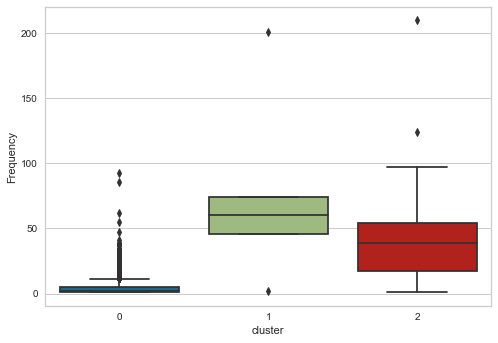

In [88]:
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Frequency)

Cluster 0 tem a menor frequencia, enquanto que o cluster 1 e 2 compram mais frequentemente.

C:\Users\temp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

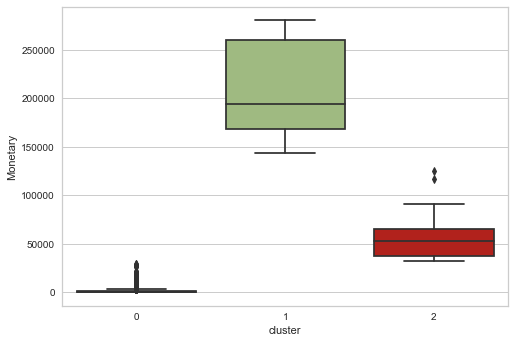

In [89]:
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Monetary)

Cluster 0 tem a menor quantia gasta, enquanto que o cluster 1 é o que mais gastou dinheiro em compras.

In [90]:
rfm_segmentation['cluster'].value_counts()

0    4308
2      26
1       5
Name: cluster, dtype: int64

De acordo com o quadro acima, percebe-se que o cluster 0 possui a grande maioria dos clientes, o que pode gerar distorções. Para evitar possiveis problemas, será feito uma análise mais detalhada.

In [91]:

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [92]:
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [93]:
quantile = rfm.quantile(q=[0.25,0.5,0.75])
quantile

,Recency,Frequency,Monetary
0.25,17.0,1.0,306.455
0.50,50.0,2.0,668.560
0.75,141.5,5.0,1660.315


In [94]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore,args=('Recency',quantile))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantile))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantile))

In [95]:
quantile.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315000000001}}

In [96]:
#calculate RFM score..

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,2,4,4,1,441
12347.0,2,7,4310.00,0,1,1,1,111
12348.0,75,4,1797.24,0,3,2,1,321
12349.0,18,1,1757.55,0,2,4,1,241
12350.0,310,1,334.40,0,4,4,3,443


In [97]:
rfm_segmentation['Total_score'] = rfm_segmentation['R_Quartile'] + rfm_segmentation['F_Quartile'] + \
rfm_segmentation['M_Quartile']

In [98]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,2,4,4,1,441,9
12347.0,2,7,4310.00,0,1,1,1,111,3
12348.0,75,4,1797.24,0,3,2,1,321,6
12349.0,18,1,1757.55,0,2,4,1,241,7
12350.0,310,1,334.40,0,4,4,3,443,11


In [99]:
print("Melhores clientes: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))
print('Clientes leais: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Maiores Gastadores: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Quase perdidos: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='134']))
print('Clientes perdidos: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='344']))
print('Clientes perdidos menos gastadores: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))

Melhores clientes:  455
Clientes leais:  872
Maiores Gastadores:  1085
Quase perdidos:  34
Clientes perdidos:  210
Clientes perdidos menos gastadores:  441
